<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: The input layer is where certain information is passed to the neural network
### Hidden Layer: A hidden layer is where information from the previous layer is transformed in some way and passed to the next layer. It is neither the input or output layer.
### Output Layer: The output layer is where the results of the neural network end up to be used.
### Neuron: A neuron is an individual node of a layer
### Weight: How strong of an impact a given input has on a given node
### Activation Function: The mapping of input(s) to output(s) for a given node
### Node Map: A diagram showing how all of the nodes connect to each other
### Perceptron: A perceptron is just a single node mapping input(s) to output(s) according to the weights


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Inputs are passed to the input layer. Then inside the neural network, the inputs are passed to the next (hidden) layer. Each node in that hidden layer processes the input(s) it receives according to the weights in that node's activation function. The node then passes its output to the next layer according to the node map. This process continues until all output nodes have received a value. At each layer in the neural network, there may be a bias input to the layer that is taken as an input by some or all nodes in that layer.

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [43]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [124]:
class Perceptron(object):
    
    def __init__(self, niter = 10):
        self.niter = niter
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = self.__sigmoid(x)
        return sx * (1-sx)

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """
        # Randomly Initialize Weights
        X['ones'] = np.ones(X.shape[0])
        weights = np.zeros(X.shape[1])

        for i in range(self.niter):
            # Weighted sum of inputs / weights
            weighted = np.dot(X, weights)
            
            # Activate!
            pred = self.__sigmoid(weighted)
            
            # Calc error
            errors = y.values - pred.reshape(-1,1)

            # Update the Weights
            adjustments = errors*self.__sigmoid_derivative(pred).reshape(-1,1)
            weights += np.dot(X.T, adjustments).reshape(3)

        self.weights = weights
            


    def predict(self, X):
        print(self.weights)
        print(self.weights.shape, X.shape)
        pred = np.dot(self.weights, X)
        return pred
    
p = Perceptron(niter = 10000)
p.fit(X,y)
p.predict(X.iloc[0])

[-11.83940805 -11.83940805  17.80797679]
(3,) (3,)


17.807976794620327

In [112]:
p.predict(X[0])

[-0.46722186 -0.46722186  1.17752266]


ValueError: shapes (3,) and (4,) not aligned: 3 (dim 0) != 4 (dim 0)

In [120]:
print(X.iloc[0])

0       0.0
1       0.0
ones    1.0
Name: 0, dtype: float64


In [63]:
import pandas as pd
X = pd.DataFrame([[0,0]
    ,[1,0]
    ,[0,1]
    ,[1,1]])

y = pd.DataFrame([[1],[1],[1],[0]])

In [42]:
np.zeros(3)[1:]

array([0., 0.])

In [37]:
pn = Perceptron(0.1, 1000)
pn.fit(X,y)

[0. 0. 0.]


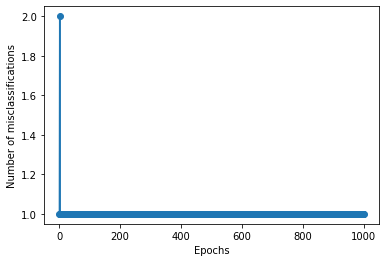

In [32]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(pn.errors) +1), pn.errors, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [28]:
pn.predict(X)

array([1, 1, 1, 1])

## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [ ]:
##### Your Code Here #####

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?